In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.stats as ss

import elfi
from elfi.examples import bdm

# Improving the posterior with post-processing

In [2]:
m = bdm.get_model()
seed = 20170511
threshold = 0.2
batch_size = 1000
n_samples = 500

rej = elfi.Rejection(m, m['d'], outputs=['T1'], batch_size=batch_size, seed=seed)
T1_res = rej.sample(n_samples, threshold=threshold)

# Linear adjustment

In [3]:
from elfi.methods.post_processing import adjust_posterior
adj = adjust_posterior(m, T1_res, ['alpha'], ['T1']).outputs['alpha']

# Comparison to analytical solution

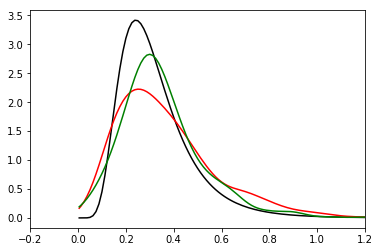

In [4]:
# Load a precomputed posterior based on an analytic solution (see Lintusaari et al 2016)
matdata = sio.loadmat('./resources/bdm.mat')
x = matdata['likgrid'].reshape(-1)
posterior_at_x = matdata['post'].reshape(-1)

plt.figure()
plt.plot(x, posterior_at_x, c='k')

dists = T1_res.outputs['d']
alphas = T1_res.outputs['alpha']
kde = ss.gaussian_kde(alphas[dists<=threshold])
plt.plot(x, kde(x), c='r')

la_kde = ss.gaussian_kde(np.squeeze(adj))
plt.plot(x, la_kde(x), c='g')
plt.xlim([-.2, 1.2]);

In [5]:
adj.mean()

0.35199354166477109

# Multiple parameters

In [6]:
from elfi.examples import ma2
m2 = ma2.get_model()

In [7]:
seed = 20170511
threshold = 0.2
batch_size = 1000
n_samples = 500

rej2 = elfi.Rejection(m2, m2['d'], outputs=['S1', 'S2'], batch_size=batch_size, seed=seed)
res2 = rej2.sample(n_samples, threshold=threshold)

In [8]:
adj2 = adjust_posterior(m2, res2, ['t1', 't2'], ['S1', 'S2'])

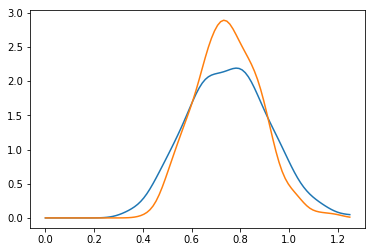

In [9]:
plt.figure()
t = np.linspace(0, 1.25, 100)
plt.plot(t, ss.gaussian_kde(res2.outputs['t1'])(t))
plt.plot(t, ss.gaussian_kde(adj2.outputs['t1'])(t));

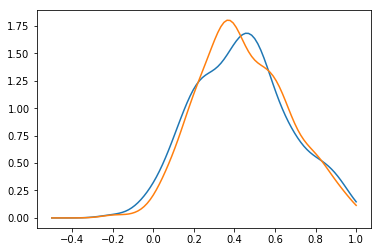

In [10]:
plt.figure()
t = np.linspace(-0.5, 1, 100)
plt.plot(t, ss.gaussian_kde(res2.outputs['t2'])(t))
plt.plot(t, ss.gaussian_kde(adj2.outputs['t2'])(t));